<a href="https://colab.research.google.com/github/Prateek-Jagadish/aave-credit-score/blob/main/Zeru1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files
uploaded = files.upload()


Saving user-wallet-transactions.json to user-wallet-transactions.json


In [2]:
import json
import pandas as pd

# Get the uploaded file name
file_name = list(uploaded.keys())[0]

# Load the JSON
with open(file_name, 'r') as f:
    data = json.load(f)

# Convert to DataFrame
df = pd.DataFrame(data)

# Show first few rows
df.head()


,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,1629178166,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,1621525013,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,1627118913,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,1627773318,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,1618845907,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [3]:
# See data types and non-null values
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   _id          100000 non-null  object
 1   userWallet   100000 non-null  object
 2   network      100000 non-null  object
 3   protocol     100000 non-null  object
 4   txHash       100000 non-null  object
 5   logId        100000 non-null  object
 6   timestamp    100000 non-null  int64 
 7   blockNumber  100000 non-null  int64 
 8   action       100000 non-null  object
 9   actionData   100000 non-null  object
 10  __v          100000 non-null  int64 
 11  createdAt    100000 non-null  object
 12  updatedAt    100000 non-null  object
dtypes: int64(3), object(10)
memory usage: 9.9+ MB


In [4]:
df['action'].value_counts()


,count
action,
deposit,37808
redeemunderlying,32305
borrow,17086
repay,12553
liquidationcall,248


In [5]:
#To converting the timestamp into readable format
df['timestamp'] = pd.to_datetime(df['timestamp'], unit='s')
df.head()


,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}
1,{'$oid': '681aa70dd6df53021cc6f3c0'},0x000000000051d07a4fb3bd10121a343d85818da6,polygon,aave_v2,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,0xe6fc162c86b2928b0ba9b82bda672763665152b9de9d...,2021-05-20 15:36:53,1621525013,deposit,"{'type': 'Deposit', 'amount': '145000000000000...",0,{'$date': '2025-05-07T00:19:26.159Z'},{'$date': '2025-05-07T00:19:26.159Z'}
2,{'$oid': '681d04c2d63812d4654c733e'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,0xe2d7eb815c89331a734ed6f204a06c385a1b39040baa...,2021-07-24 09:28:33,1627118913,deposit,"{'type': 'Deposit', 'amount': '100000000000000...",0,{'$date': '2025-05-08T19:23:47.877Z'},{'$date': '2025-05-08T19:23:47.877Z'}
3,{'$oid': '681d133bd63812d46551b6ef'},0x000000000096026fb41fc39f9875d164bd82e2dc,polygon,aave_v2,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,0x0d63a2eacd82b82f868db825ea7385e6bd8d046ee729...,2021-07-31 23:15:18,1627773318,deposit,"{'type': 'Deposit', 'amount': '400000000000000...",0,{'$date': '2025-05-08T20:25:33.141Z'},{'$date': '2025-05-08T20:25:33.141Z'}
4,{'$oid': '681899e4ba49fc91cf2f4454'},0x0000000000e189dd664b9ab08a33c4839953852c,polygon,aave_v2,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,0x590eabb812c5006a6f4766f44e6e9d3ad0b5b563de69...,2021-04-19 15:25:07,1618845907,redeemunderlying,"{'type': 'RedeemUnderlying', 'amount': '501548...",0,{'$date': '2025-05-05T10:58:45.934Z'},{'$date': '2025-05-05T10:58:45.934Z'}


In [7]:
# visually understand how one wallet is interacting with Aave
# Pick the first wallet
wallet_id = df['userWallet'].iloc[0]

# Show all transactions by this wallet
df[df['userWallet'] == wallet_id]


,_id,userWallet,network,protocol,txHash,logId,timestamp,blockNumber,action,actionData,__v,createdAt,updatedAt
0,{'$oid': '681d38fed63812d4655f571a'},0x00000000001accfa9cef68cf5371a23025b6d4b6,polygon,aave_v2,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,0x695c69acf608fbf5d38e48ca5535e118cc213a89e3d6...,2021-08-17 05:29:26,1629178166,deposit,"{'type': 'Deposit', 'amount': '2000000000', 'a...",0,{'$date': '2025-05-08T23:06:39.465Z'},{'$date': '2025-05-08T23:06:39.465Z'}


In [9]:
# Group by wallet and action, then count
action_counts = df.groupby(['userWallet', 'action']).size().unstack(fill_value=0)

# Rename columns if needed
action_counts.columns = [col.lower() for col in action_counts.columns]

# Ensure all expected action columns exist (some might be missing for some wallets)
for col in ['deposit', 'borrow', 'repay', 'redeemunderlying', 'liquidationcall']:
    if col not in action_counts.columns:
        action_counts[col] = 0

# Add total transactions
action_counts['total_txns'] = action_counts.sum(axis=1)

# Calculate behavior-based features
action_counts['repay_rate'] = action_counts['repay'] / (action_counts['borrow'] + 1)  # +1 to avoid division by zero
action_counts['deposit_borrow_ratio'] = action_counts['deposit'] / (action_counts['borrow'] + 1)
action_counts['is_liquidated'] = (action_counts['liquidationcall'] > 0).astype(int)

# Reset index to make wallet a column
features_df = action_counts.reset_index()

features_df.head()


,userWallet,borrow,deposit,liquidationcall,redeemunderlying,repay,total_txns,repay_rate,deposit_borrow_ratio,is_liquidated
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,0,1,0,0,0,1,0.00,1.000,0
1,0x000000000051d07a4fb3bd10121a343d85818da6,0,1,0,0,0,1,0.00,1.000,0
2,0x000000000096026fb41fc39f9875d164bd82e2dc,0,2,0,0,0,2,0.00,2.000,0
3,0x0000000000e189dd664b9ab08a33c4839953852c,0,0,0,17,0,17,0.00,0.000,0
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,15,250,0,130,4,399,0.25,15.625,0


In [10]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Select scoring features
scoring_df = features_df[['repay_rate', 'deposit_borrow_ratio', 'total_txns']].copy()

# Scale features to 0–1
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(scoring_df)

# Convert back to DataFrame
scaled_df = pd.DataFrame(scaled_features, columns=scoring_df.columns)

# Add back to main DataFrame
features_df[['scaled_repay', 'scaled_deposit_ratio', 'scaled_txns']] = scaled_df

# Score calculation (you can tweak weights)
features_df['raw_score'] = (
    0.4 * features_df['scaled_repay'] +
    0.4 * features_df['scaled_deposit_ratio'] +
    0.2 * features_df['scaled_txns'] -
    0.5 * features_df['is_liquidated']
)

# Normalize raw_score to 0–1000 range
min_raw = features_df['raw_score'].min()
max_raw = features_df['raw_score'].max()

features_df['credit_score'] = (
    (features_df['raw_score'] - min_raw) / (max_raw - min_raw) * 1000
).clip(lower=0).astype(int)

# Show final result
features_df[['userWallet', 'credit_score']].head()


,userWallet,credit_score
0,0x00000000001accfa9cef68cf5371a23025b6d4b6,474
1,0x000000000051d07a4fb3bd10121a343d85818da6,474
2,0x000000000096026fb41fc39f9875d164bd82e2dc,476
3,0x0000000000e189dd664b9ab08a33c4839953852c,471
4,0x0000000002032370b971dabd36d72f3e5a7bf1ee,521


In [11]:
# Save wallet and score only
features_df[['userWallet', 'credit_score']].to_csv('wallet_credit_scores.csv', index=False)


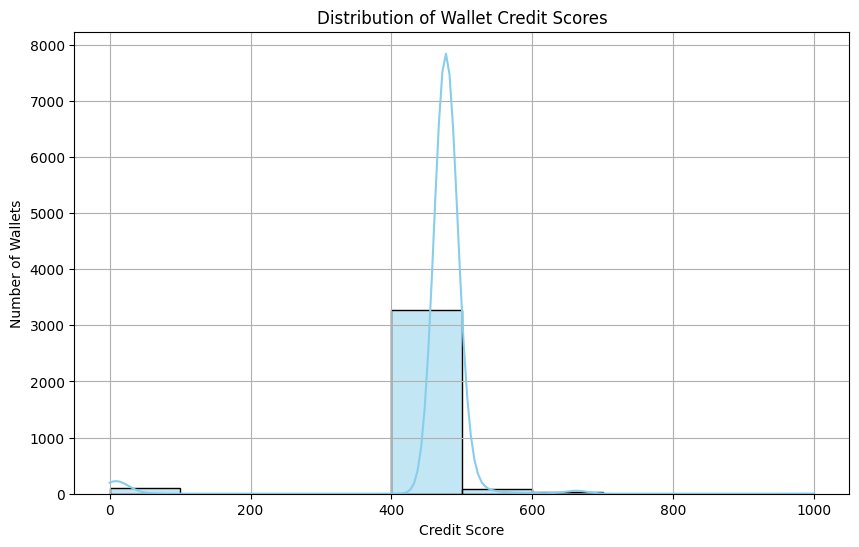

In [12]:
# Plot Score Distribution
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(features_df['credit_score'], bins=10, kde=True, color='skyblue', edgecolor='black')
plt.title('Distribution of Wallet Credit Scores')
plt.xlabel('Credit Score')
plt.ylabel('Number of Wallets')
plt.grid(True)
plt.show()



In [13]:
# Score Ranges Summary
score_bins = pd.cut(features_df['credit_score'], bins=[0,100,200,300,400,500,600,700,800,900,1000])
distribution = score_bins.value_counts().sort_index()
distribution


,count
credit_score,
"(0, 100]",99
"(100, 200]",0
"(200, 300]",0
"(300, 400]",0
"(400, 500]",3285
"(500, 600]",83
"(600, 700]",26
"(700, 800]",0
"(800, 900]",1
